In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load all data from Shen+2010 quasar catalog

In [2]:
from astropy.io import fits

cat = fits.open("../SDSS-DR7/dr7_bh_Nov19_2013.fits")
hdu1 = cat[1]
name, ra, dec, redshift, plate, fiber, mjd,  = [], [], [], [], [], [], []
logl_oiii, err_logl_oiii = [], []
logl_hb_broad, err_logl_hb_broad = [], []
logl_hb_narrow, err_logl_hb_narrow = [], []
logl_ha_broad, err_logl_ha_broad = [], []
logl_ha_narrow, err_logl_ha_narrow = [], []
logl_nii, err_logl_nii = [], []
logl_mgii, err_logl_mgii = [], []

ew_oiii, err_ew_oiii = [], []
ew_hb_broad, err_ew_hb_broad = [], []
ew_mgii, err_ew_mgii = [], []
fwhm_oiii, err_fwhm_oiii = [], []
fwhm_hb_broad, err_fwhm_hb_broad = [], []
fwhm_mgii, err_fwhm_mgii = [], []

log_bh, err_log_bh = [], []
log_bol, err_log_bol = [], []
log_5100, err_log_5100 = [], []
edd = []

for i in range(len(hdu1.data)):
    if hdu1.data['EW_OIII_5007'][i] / hdu1.data['EW_OIII_5007_ERR'][i] > 3 \
    and hdu1.data['EW_BROAD_HB'][i] / hdu1.data['EW_BROAD_HB_ERR'][i] > 3 \
    and hdu1.data['EW_NARROW_HB'][i] / hdu1.data['EW_NARROW_HB_ERR'][i] > 3 \
    and hdu1.data['EW_BROAD_HA'][i] / hdu1.data['EW_BROAD_HA_ERR'][i] > 3 \
    and hdu1.data['EW_NARROW_HA'][i] / hdu1.data['EW_NARROW_HA_ERR'][i] > 3 \
    and hdu1.data['LOGBH'][i] > 0. :    
        name.append(hdu1.data['SDSS_NAME'][i])
        ra.append(hdu1.data['RA'][i])
        dec.append(hdu1.data['DEC'][i])
        redshift.append(hdu1.data['REDSHIFT'][i])
        plate.append(str(hdu1.data['PLATE'][i]).zfill(4))
        fiber.append(str(hdu1.data['FIBER'][i]).zfill(3))
        mjd.append(str(hdu1.data['MJD'][i]).zfill(5))
        
        logl_oiii.append(hdu1.data['LOGL_OIII_5007'][i])
        logl_hb_broad.append(hdu1.data['LOGL_BROAD_HB'][i])
        logl_hb_narrow.append(hdu1.data['LOGL_NARROW_HB'][i])
        logl_ha_broad.append(hdu1.data['LOGL_BROAD_HA'][i])
        logl_ha_narrow.append(hdu1.data['LOGL_NARROW_HA'][i])

        err_logl_oiii.append(hdu1.data['LOGL_OIII_5007_ERR'][i])
        err_logl_hb_broad.append(hdu1.data['LOGL_BROAD_HB_ERR'][i])
        err_logl_hb_narrow.append(hdu1.data['LOGL_BROAD_HB_ERR'][i])
        err_logl_ha_broad.append(hdu1.data['LOGL_BROAD_HA_ERR'][i])
        err_logl_ha_narrow.append(hdu1.data['LOGL_BROAD_HA_ERR'][i])
        
        ew_oiii.append(hdu1.data['EW_OIII_5007'][i])
        err_ew_oiii.append(hdu1.data['EW_OIII_5007_ERR'][i])
        ew_hb_broad.append(hdu1.data['EW_BROAD_HB'][i])
        err_ew_hb_broad.append(hdu1.data['EW_BROAD_HB_ERR'][i])
        ew_mgii.append(hdu1.data['EW_MGII'][i])
        err_ew_mgii.append(hdu1.data['EW_MGII_ERR'][i])

        fwhm_hb_broad.append(hdu1.data['FWHM_BROAD_HB'][i])
        err_fwhm_hb_broad.append(hdu1.data['FWHM_BROAD_HB_ERR'][i])
        fwhm_mgii.append(hdu1.data['FWHM_MGII'][i])
        err_fwhm_mgii.append(hdu1.data['FWHM_MGII_ERR'][i])

        edd.append(hdu1.data['LOGEDD_RATIO'][i])
        
        log_bh.append(hdu1.data['LOGBH'][i])
        err_log_bh.append(hdu1.data['LOGBH_ERR'][i])

        log_bol.append(hdu1.data['LOGLBOL'][i])
        err_log_bol.append(hdu1.data['LOGLBOL_ERR'][i])
        
        log_5100.append(hdu1.data['LOGL5100'][i])
        err_log_5100.append(hdu1.data['LOGL5100_ERR'][i])
        
        logl_nii.append(hdu1.data['LOGL_NII_6585'][i])
        err_logl_nii.append(hdu1.data['LOGL_NII_6585_ERR'][i])
        
        logl_mgii.append(hdu1.data['LOGL_MGII'][i])
        err_logl_mgii.append(hdu1.data['LOGL_MGII_ERR'][i])

### Divide sources into different classes (save in different files)

low_oiii: lowest 2.5% oiii/hb_broad ratio

high_oiii: highest 2.5% oiii/hb_broad ratio

low_edd:

low_bpt:

In [3]:
import numpy as np
ratio = [oiii - hb for oiii,
         hb in zip(logl_oiii, logl_hb_broad)]  # oiii/hb_broad
error = [np.sqrt(oiii**2+hb**2) for oiii,
         hb in zip(err_logl_oiii, err_logl_hb_broad)]  # error of ratio

# hb_narrow/hb_broad
ratio_hb = [n-b for n, b in zip(logl_hb_narrow, logl_hb_broad)]
ratio_nii = [nii-ha for nii,
             ha in zip(logl_nii, logl_ha_narrow)]  # nii/ha_narrow
ratio_oiii = [oiii-hb for oiii,
              hb in zip(logl_oiii, logl_hb_narrow)]  # oiii/hb_narrow
ratio_balmer = [ha-hb for ha, hb in zip(logl_ha_broad, logl_hb_broad)]

# the lowest 2.5% and the highest 2.5% of oiii/hb_broad
# l, h are the two critical values
low_idx = int(0.025*len(ratio))
high_idx = int(0.975*len(ratio))
l, h = sorted(ratio)[low_idx], sorted(ratio)[high_idx]
m = np.mean(ratio)

# balmer decrement: select sources with balmer decrement in a narrow range
# a, b are the two critical values
mean_bmr = np.mean(ratio_balmer)
a, b = mean_bmr-0.2, mean_bmr+0.2
c = np.mean(ratio_balmer)

target_file = open("../low_oiii_list", "w+")
for idx, r in enumerate(ratio):
    if r <= l and ratio_balmer[idx] <= b and ratio_balmer[idx] >= a:
        print(name[idx], ra[idx], dec[idx], plate[idx], fiber[idx],
              mjd[idx], redshift[idx], r, sep=' ', file=target_file)
target_file.close()

target_file = open("../high_oiii_list", "w+")
for idx, r in enumerate(ratio):
    if r >= h and ratio_balmer[idx] <= b and ratio_balmer[idx] >= a:
        print(name[idx], ra[idx], dec[idx], plate[idx], fiber[idx],
              mjd[idx], redshift[idx], r, sep=' ', file=target_file)
target_file.close()

target_file = open("../norm_oiii_list", "w+")
for idx, r in enumerate(ratio):
    if r > l and r < h and ratio_balmer[idx] <= b and ratio_balmer[idx] >= a:
        print(name[idx], ra[idx], dec[idx], plate[idx], fiber[idx],
              mjd[idx], redshift[idx], r, sep=' ', file=target_file)
target_file.close()

target_file = open("../low_edd_list", "w+")
for idx, r in enumerate(ratio):
    if r >= h and ratio_balmer[idx] <= b and ratio_balmer[idx] >= a and edd[idx] <= -2:
        print(name[idx], ra[idx], dec[idx], plate[idx], fiber[idx],
              mjd[idx], redshift[idx], r, sep=' ', file=target_file)
target_file.close()

target_file = open("../low_bpt_list", "w+")
for idx, r in enumerate(ratio):
    if r <= l and ratio_balmer[idx] <= b and ratio_balmer[idx] >= a:
        if logl_nii[idx] != 0 and (logl_oiii[idx]-logl_hb_narrow[idx]) \
                < (0.61 / ((logl_nii[idx]-logl_ha_narrow[idx]) - 0.05) + 1.3):
            print(name[idx], ra[idx], dec[idx], plate[idx], fiber[idx],
                  mjd[idx], redshift[idx], r, sep=' ', file=target_file)
target_file.close()

In [4]:
with open("../low_oiii_list") as f:
    lines = f.readlines()
    lines = [line.split() for line in lines]
    low_oiii_cross_id = [line[3]+'-'+line[4]+'-'+line[5] for line in lines]
    
with open("../high_oiii_list") as f:
    lines = f.readlines()
    lines = [line.split() for line in lines]
    high_oiii_cross_id = [line[3]+'-'+line[4]+'-'+line[5] for line in lines]
    
with open("../norm_oiii_list") as f:
    lines = f.readlines()
    lines = [line.split() for line in lines]
    norm_oiii_cross_id = [line[3]+'-'+line[4]+'-'+line[5] for line in lines]
    
with open("../low_edd_list") as f:
    lines = f.readlines()
    lines = [line.split() for line in lines]
    low_edd_cross_id = [line[3]+'-'+line[4]+'-'+line[5] for line in lines]
    
with open("../low_bpt_list") as f:
    lines = f.readlines()
    lines = [line.split() for line in lines]
    low_bpt_cross_id = [line[3]+'-'+line[4]+'-'+line[5] for line in lines]

### Create a dataframe which contains all the sources selceted

In [5]:
import pandas as pd
index = [p+'-'+f+'-'+m for p,f,m in zip(plate,fiber,mjd)]
data = {
    'NAME':name,
    'RA':ra,
    'DEC':dec,
    'REDSHIFT':redshift,
    
    'PLATE':plate,
    'FIBER':fiber,
    'MJD':mjd,
    
    'RATIO':ratio,
    'RATIO_ERROR':error,
    
    'OIII':logl_oiii,
    'HB_BROAD':logl_hb_broad,
    'HB_NARROW':logl_hb_narrow,
    'MGII':logl_mgii,
    
    'EW_OIII':ew_oiii,
    'EW_OIII_ERR':err_ew_oiii,
    'EW_HB_BROAD':ew_hb_broad,
    'EW_HB_BROAD_ERR':err_ew_hb_broad,
    'EW_MGII':ew_mgii,
    'EW_MGII_ERR':err_ew_mgii,
  
    'FWHM_HB_BROAD':fwhm_hb_broad,
    'FWHM_MGII':fwhm_mgii,
    
    'EDD_RATIO':edd,
    
    'BH':log_bh,
    'BH_ERR':err_log_bh,
    
    'L':log_bol,
    'L_ERR':err_log_bol,
    
    'L_5100':log_5100,
    
    'NII':logl_nii,
    'HA_BROAD':logl_ha_broad,
    'HA_NARROW':logl_ha_narrow,
    
    'RATIO_HB':ratio_hb,
    'RATIO_NII':ratio_nii,
    'RATIO_OIII':ratio_oiii,
    'RATIO_BALMER':ratio_balmer
}
catalog = pd.DataFrame(data, index)

In [6]:
low_oiii_cat = catalog.loc[low_oiii_cross_id]
high_oiii_cat = catalog.loc[high_oiii_cross_id]
norm_oiii_cat = catalog.loc[norm_oiii_cross_id]
low_edd_cat = catalog.loc[low_edd_cross_id]
low_bpt_cat = catalog.loc[low_bpt_cross_id]

In [7]:
print(len(high_oiii_cat),len(low_oiii_cat),len(norm_oiii_cat),sep=', ')
print(len(low_edd_cat),len(low_bpt_cat),sep=', ')

23, 34, 1168
5, 8


### eddington ratio plot

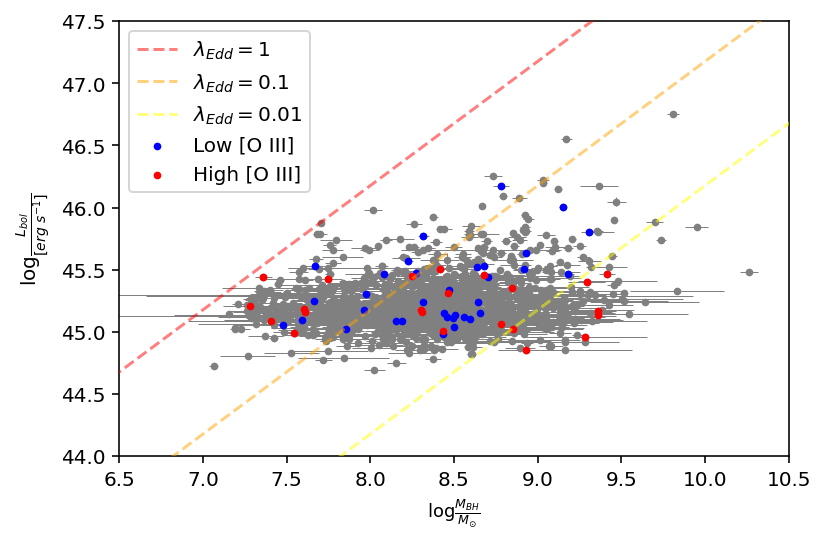

In [8]:
%config InlineBackend.figure_format = 'retina'

color = [i-j for i,j in zip(logl_hb_narrow,logl_hb_broad)]
plt.errorbar(log_bh,log_bol,xerr=err_log_bh,yerr=err_log_bol,\
            linestyle='None',elinewidth=0.5,zorder=1,c='grey')
plt.scatter(log_bh,log_bol,s=8,zorder=3,c='grey')
# plt.colorbar()
plt.scatter(low_oiii_cat['BH'],low_oiii_cat['L'],s=8,zorder=4,label='Low [O III]',c='blue')
plt.scatter(high_oiii_cat['BH'],high_oiii_cat['L'],s=8,zorder=4,label='High [O III]',c='red')
plt.xlim(6.5,10.5)
plt.ylim(44,47.5)

x = [6,12]
y1 = [i + 38 + np.log10(1.5) for i in x]
y2 = [i + 38 + np.log10(1.5) - 1 for i in x]
y3 = [i + 38 + np.log10(1.5) - 2 for i in x]
plt.plot(x,y1,linestyle='--',c='red',zorder=5,label=r'$\lambda_{Edd}=1$',alpha=0.5)
plt.plot(x,y2,linestyle='--',c='orange',zorder=5,label=r'$\lambda_{Edd}=0.1$',alpha=0.5)
plt.plot(x,y3,linestyle='--',c='yellow',zorder=5,label=r'$\lambda_{Edd}=0.01$',alpha=0.5)

plt.xlabel(r'log$\frac{M_{BH}}{M_{\odot}}$',fontsize=9)
plt.ylabel(r'log$\frac{L_{bol}}{[erg\ s^{-1}]}$',fontsize=10)
plt.legend()
# plt.savefig('../figure/j_edd.pdf')

### BPT diagram plot

(-2.8, 0.5)

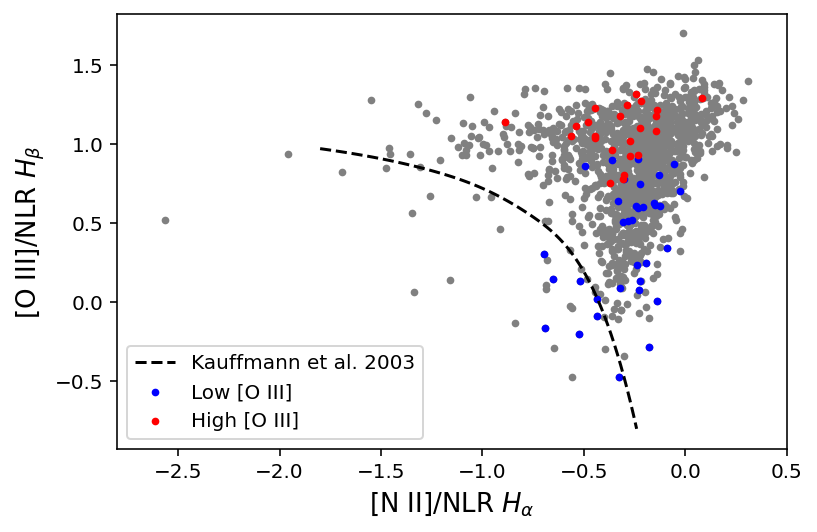

In [12]:
%config InlineBackend.figure_format = 'retina'

x = [-1.8,-1.5,-1.25,-1.0,-0.75,-0.5,-0.24]
y = [0.61 / (i - 0.05) + 1.3 for i in x]

from scipy.interpolate import make_interp_spline
xn = np.linspace(min(x),max(x),100) #300 represents number of points to make between T.min and T.max
yn = make_interp_spline(x,y)(xn)

plt.plot(xn,yn,c='black',zorder=5,linestyle='--',label='Kauffmann et al. 2003')
plt.scatter(ratio_nii,ratio_oiii,s=8,zorder=3,c='grey')
plt.scatter(low_oiii_cat['RATIO_NII'],low_oiii_cat['RATIO_OIII'],s=8,zorder=4,label='Low [O III]',c='blue')
plt.scatter(high_oiii_cat['RATIO_NII'],high_oiii_cat['RATIO_OIII'],s=8,zorder=4,label='High [O III]',c='red')
plt.xlabel(r'[N II]/NLR $H_\alpha$',fontsize=13)
plt.ylabel(r'[O III]/NLR $H_\beta$',fontsize=13)
# plt.title('BPT diagram',fontsize=13)
plt.legend(loc='best')
plt.xlim(-2.8,0.5)
# plt.savefig('../figure/j_bpt.pdf')

### Balmer Decremtn Plot

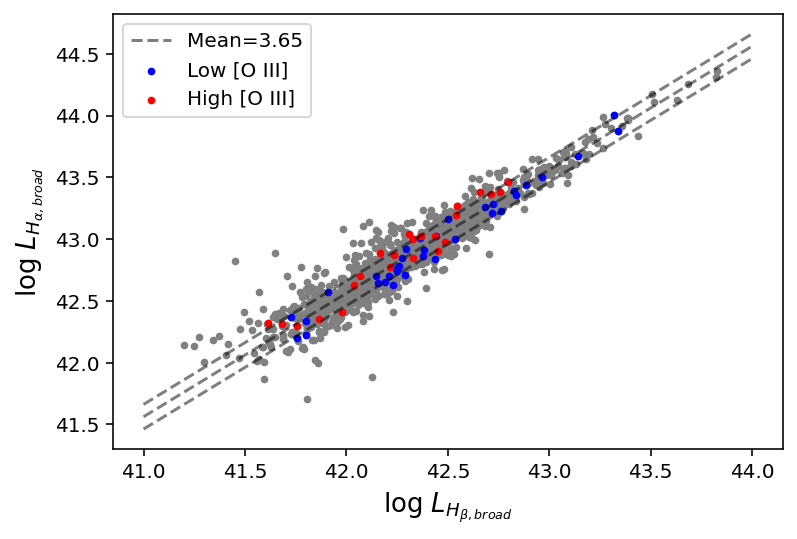

In [13]:
%config InlineBackend.figure_format = 'retina'

x = [41,44]
y1 = [i+np.mean(ratio_balmer) for i in x]
y2 = [i+np.mean(ratio_balmer)-0.1 for i in x]
y3 = [i+np.mean(ratio_balmer)+0.1 for i in x]

plt.plot(x,y1,linestyle='--',c='black',zorder=5,label='Mean=3.65',alpha=0.5)
plt.plot(x,y2,linestyle='--',c='black',zorder=5,alpha=0.5)
plt.plot(x,y3,linestyle='--',c='black',zorder=5,alpha=0.5)

plt.scatter(logl_hb_broad,logl_ha_broad,s=8,c='grey')
plt.scatter(low_oiii_cat['HB_BROAD'],low_oiii_cat['HA_BROAD'],s=8,zorder=3,label='Low [O III]',c='blue')
plt.scatter(high_oiii_cat['HB_BROAD'],high_oiii_cat['HA_BROAD'],s=8,zorder=3,label='High [O III]',c='red')

# plt.scatter(low_edd_cat['HB_BROAD'],low_edd_cat['HA_BROAD'],s=8,zorder=3,label='Turn-Off',c='orange')

plt.xlabel(r'log $L_{H_{\beta,broad}}$',fontsize=13)
plt.ylabel(r'log $L_{H_{\alpha,broad}}$',fontsize=13)
plt.legend()
# plt.savefig('../figure/j_balmer.pdf')

### Finally, oiii/hb_broad plot

The green spot is the source described in Schirmer et al. 2012 (**A sample of Seyfert-2 galaxies with ultra-luminous galaxy-wide NLRs–Quasar light echos?**)

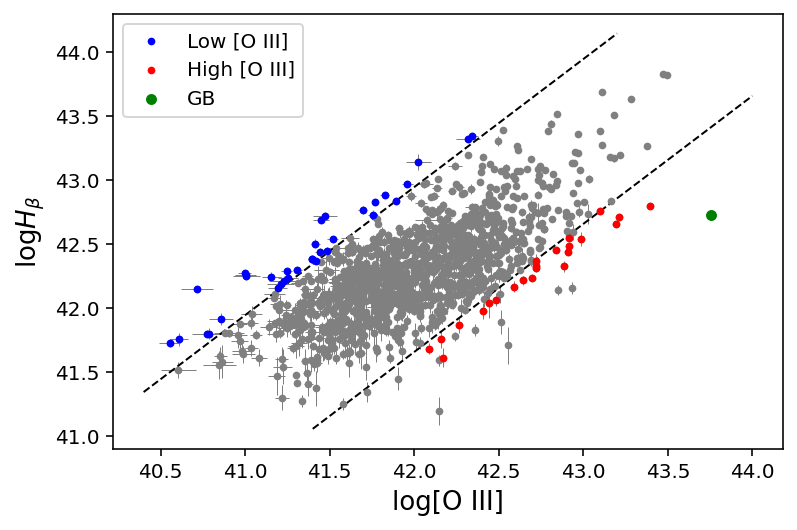

In [14]:
%config InlineBackend.figure_format = 'retina'

x_1 = [40.4, 43.2]
y_1 = [x-l for x in x_1]
x_2 = [41.4, 44]
y_2 = [x-h for x in x_2]

plt.plot(x_1,y_1,zorder=2,linewidth=1,linestyle='--',c='black')
plt.plot(x_2,y_2,zorder=2,linewidth=1,linestyle='--',c='black')

plt.errorbar(logl_oiii,logl_hb_broad,xerr=err_logl_oiii,yerr=err_logl_hb_broad,\
             linestyle='None',elinewidth=0.5,zorder=1,c='grey')

plt.scatter(logl_oiii,logl_hb_broad,s=8,zorder=3,c='grey')
plt.scatter(low_oiii_cat['OIII'],low_oiii_cat['HB_BROAD'],s=8,zorder=4,c='blue',label='Low [O III]')
plt.scatter(high_oiii_cat['OIII'],high_oiii_cat['HB_BROAD'],s=8,zorder=4,c='red',label='High [O III]')

xx = [np.log10(5667)+40]
yy = [np.log10(536)+40]
plt.scatter(xx,yy,zorder=6,s=20,c='green',label='GB')

plt.xlabel(r'log[O III]',fontsize=13)
plt.ylabel(r'log$H_\beta$',fontsize=13)
# plt.colorbar(label=r'log$\frac{H_{\beta ,Narrow}}{H_{\beta ,Broad}}$')
plt.legend(loc='best')
# plt.savefig("../figure/j_ratio.pdf")

(-2.5, 2.0)

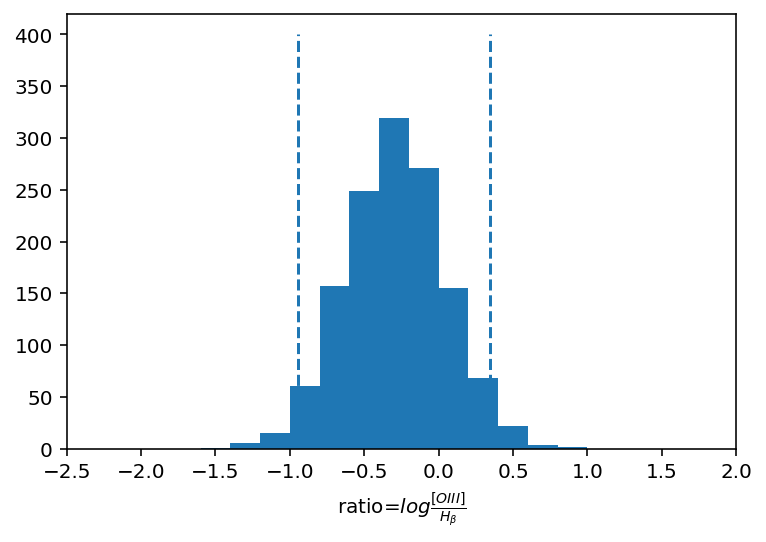

In [16]:
plt.hist(ratio, range=(-4,4), log=False, bins=40)

low_idx = int(0.025*len(ratio))
high_idx = int(0.975*len(ratio))
l, h = sorted(ratio)[low_idx], sorted(ratio)[high_idx]

plt.vlines(l,0,400,linestyle='--')
plt.vlines(h,0,400,linestyle='--')
plt.xlabel(r'ratio=$log\frac{[O III]}{H_\beta}$')
plt.xlim(-2.5,2)
# plt.savefig("../figure/hist.pdf")

### Composite Spectrum

1. redshift is given by Shen+2010
2. use numpy.interp to interpolate
3. rebin (1A) after interpolation 
4. rescale with 5100A flux
5. use the median composite spectrum (Vanden Berk et al. 2001)

In [17]:
def Load_Spectrum(_id, _cat):
    # Load Spectrum Data
    wl, flux, err = [], [], []    
    no_found = 0
    no_5100 = 0
    for id in _id[:]:
        z = _cat.loc[id,'REDSHIFT']
        try:
            f = open('../spec_data/'+id+'.dat')
        except FileNotFoundError:
            no_found += 1
            print("http://das.sdss.org/va/qso_properties_dr7/data/dered_spectra/"+id[:4]+"/"+id+".dat")
            _id.remove(id)
            _cat.drop(id, inplace=True)
            continue
        
        lines = f.readlines()[2:]
        lines = [line.split() for line in lines]
        f.close()
        
        # w: wavelength for single source
        w = [float(line[0])/(1+z) for line in lines]
        if min(w) > 5100:
            no_5100 += 1
            _id.remove(id)
            _cat.drop(id, inplace=True)   
            continue
        wl.append(w)
        flux.append([float(line[1]) for line in lines])
        err.append([float(line[2]) for line in lines])
        
    print(str(no_found)+' sources no found!')
    print(str(no_5100)+' sources no 5100 A!')
    
    _cat['WAVELENGTH'] = pd.Series(wl,_id)
    _cat['FLUX'] = pd.Series(flux,_id)
    _cat['FLUX_ERROR'] = pd.Series(err,_id)    

In [18]:
def Interpolate_Spectrum(_id, _cat):
    # Interpolate Spectrum Data
    interp_wl, interp_flux = [], []
    for cross_id in _id:
        _wl = _cat.loc[cross_id,'WAVELENGTH']
        _flux = _cat.loc[cross_id,'FLUX']
        x = range(int(min(_wl)), int(max(_wl)))
        y = np.interp(x, _wl, _flux)
        interp_wl.append(x)
        interp_flux.append(y)

    _cat['INTERP_WAVELENGTH'] = pd.Series(interp_wl,_id)
    _cat['INTERP_FLUX'] = pd.Series(interp_flux,_id)

In [19]:
def Rescale_Spectrum(_id, _cat):
    # Rescale Spectrum Data
    wavelength_list, flux_list = [], []
    rescale_flux = []
    for i in range(len(_id)):
        try:
            idx_5100 = _cat['INTERP_WAVELENGTH'][i].index(5100)
        except ValueError:
            print(_id[i]+' Value Error!')
        except AttributeError:
            print(_cat['INTERP_WAVELENGTH'][i])
            print(_id[i])
        scale_5100 = _cat['INTERP_FLUX'][i][idx_5100]
        rescale = [flux/scale_5100 \
                        for flux in _cat['INTERP_FLUX'][i]] 
        wavelength_list += _cat['INTERP_WAVELENGTH'][i]
        flux_list += rescale
        rescale_flux.append(rescale)

    _cat['RESCALE_FLUX'] = pd.Series(rescale_flux,_id)
    return wavelength_list, flux_list

In [20]:
def Stack_Spectrum(_id, _cat, wavelength_list, flux_list):
    l = list(zip(wavelength_list, flux_list))
    l.sort()
    count, flux = 0, []
    stack_wavelength, stack_flux = [], []

    # Stack All Spectrum
    for idx in range(len(l)-1):
        w, f = l[idx][0], l[idx][1]
        if f <= 0:
            continue
        if w == l[idx+1][0]:
            count += 1
            flux.append(f)
        else:
            if count >=1:
                stack_wavelength.append(w)
                stack_flux.append(np.median(flux))
                count, flux = 0, []
            else:
                count, flux = 0, []
    return stack_wavelength, stack_flux

In [21]:
def Composite_Spectrum(_id, _cat):
    Load_Spectrum(_id, _cat)
    Interpolate_Spectrum(_id, _cat)
    wll,fll = Rescale_Spectrum(_id, _cat)

    return Stack_Spectrum(_id, _cat, wll, fll)

In [22]:
low_oiii_stack_wavelength, low_oiii_stack_flux = \
    Composite_Spectrum(low_oiii_cross_id, low_oiii_cat)

0 sources no found!
0 sources no 5100 A!


In [23]:
high_oiii_stack_wavelength, high_oiii_stack_flux = \
    Composite_Spectrum(high_oiii_cross_id, high_oiii_cat)

0 sources no found!
0 sources no 5100 A!


In [24]:
norm_oiii_stack_wavelength, norm_oiii_stack_flux = \
    Composite_Spectrum(norm_oiii_cross_id, norm_oiii_cat)

0 sources no found!
0 sources no 5100 A!


In [25]:
low_edd_stack_wavelength, low_edd_stack_flux = \
    Composite_Spectrum(low_edd_cross_id, low_edd_cat)

0 sources no found!
0 sources no 5100 A!


In [26]:
low_bpt_stack_wavelength, low_bpt_stack_flux = \
    Composite_Spectrum(low_bpt_cross_id, low_bpt_cat)

0 sources no found!
0 sources no 5100 A!


In [27]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

Text(0.5, 1.0, 'Composite Spectrum')

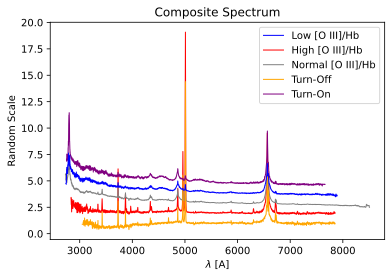

In [28]:
%config InlineBackend.figure_format = 'svg'

plt.plot(low_oiii_stack_wavelength, [i+3 for i in smooth(low_oiii_stack_flux,1)], linewidth=1, label='Low [O III]/Hb',zorder=4,color='blue')
plt.plot(high_oiii_stack_wavelength, [i+1 for i in smooth(high_oiii_stack_flux,1)], linewidth=1, label='High [O III]/Hb',color='red')
plt.plot(norm_oiii_stack_wavelength, [i+2 for i in smooth(norm_oiii_stack_flux,1)], linewidth=1, label='Normal [O III]/Hb',color='grey')

plt.plot(low_edd_stack_wavelength, [i+0 for i in smooth(low_edd_stack_flux,1)], linewidth=1, label='Turn-Off',color='orange')
plt.plot(low_bpt_stack_wavelength, [i+4 for i in smooth(low_bpt_stack_flux,1)], linewidth=1, label='Turn-On',color='purple')

# plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r"$\lambda$ [A]")
plt.ylabel("Random Scale")
plt.title("Composite Spectrum")
# plt.xlim(4500,5500)
# plt.ylim(0.25,1.25)
# plt.savefig("../figure/j_compspec.pdf")

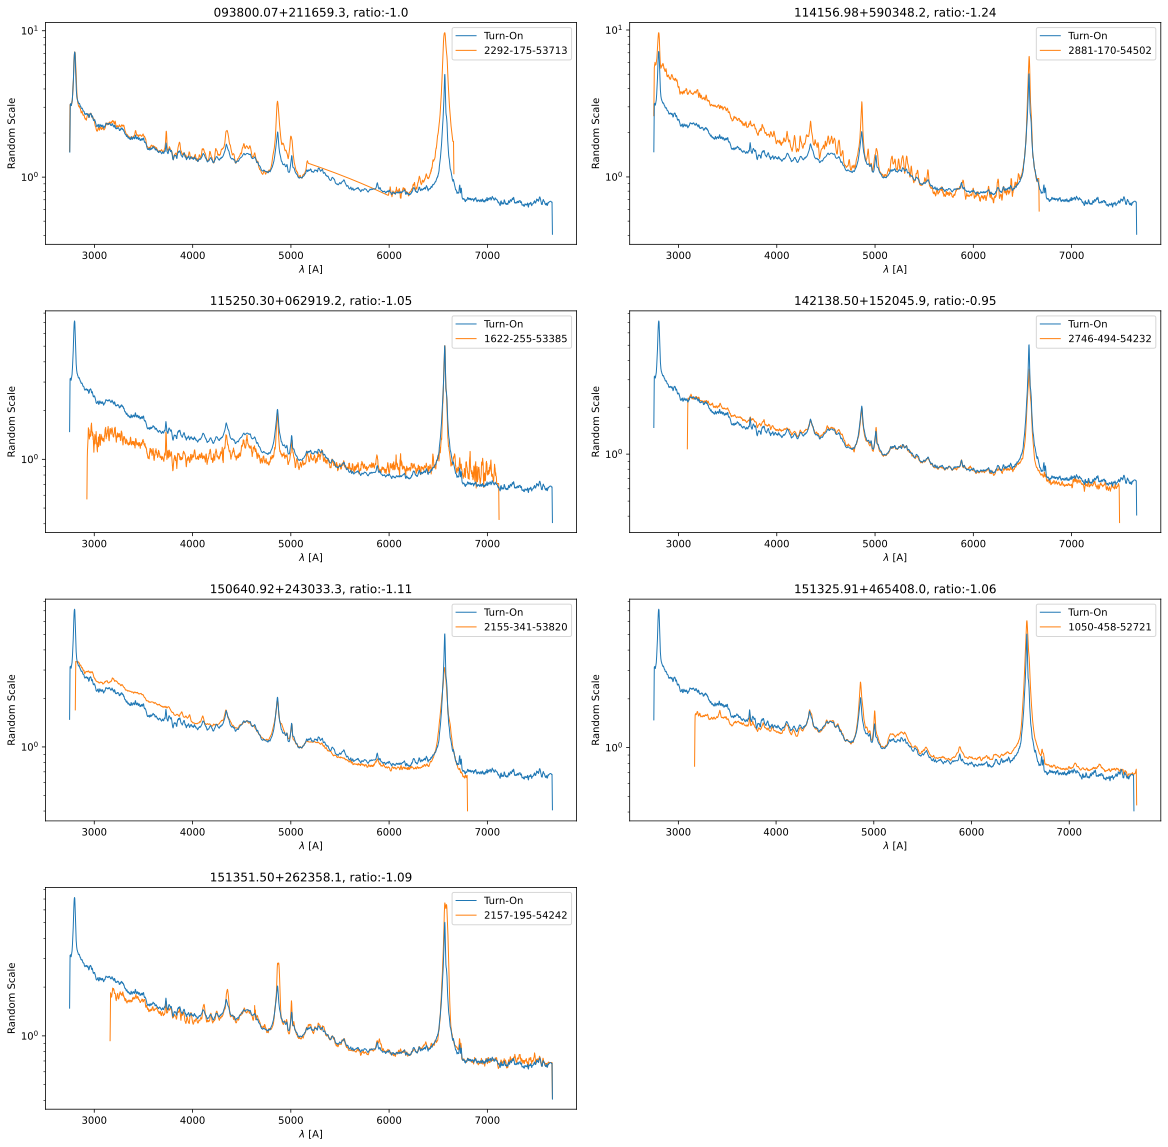

In [29]:
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

for i in range(0,7):
    _id = low_bpt_cat.index[i]
    _wl = low_bpt_cat.loc[_id,'INTERP_WAVELENGTH']
    _flux = low_bpt_cat.loc[_id,'RESCALE_FLUX']
    plt.subplot(4,2,i+1)
    plt.plot(low_bpt_stack_wavelength, smooth(low_bpt_stack_flux,10), linewidth=1, label='Turn-On',zorder=4)
    plt.plot(_wl, smooth(_flux, 10), linewidth=1, label=_id)
    plt.title(low_bpt_cat.loc[_id,'NAME']+', ratio:'+str(round(low_bpt_cat.loc[_id,'RATIO'],2)))
    plt.xlabel(r"$\lambda$ [A]")
    plt.ylabel("Random Scale")

    plt.yscale('log')
    plt.legend(loc='best')

# plt.savefig('../figure/j_on.pdf')

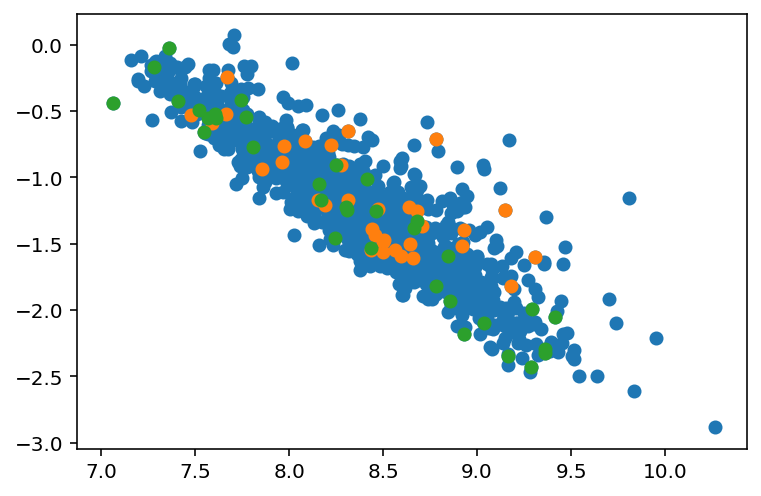

In [104]:
plt.scatter(log_bh,edd)
plt.scatter(low_oiii_cat['BH'],low_oiii_cat['EDD_RATIO'])
plt.scatter(high_oiii_cat['BH'],high_oiii_cat['EDD_RATIO'])

In [58]:
high_oiii_cat

,NAME,RA,DEC,REDSHIFT,RATIO,RATIO_ERROR,OIII,HB_BROAD,HB_NARROW,MGII,...,L,L_ERR,L_5100,NII,HA_BROAD,HA_NARROW,RATIO_HB,RATIO_NII,RATIO_OIII,RATIO_BALMER
0457-324-51901,025105.28-070230.1,42.772015,-7.041717,0.3268,0.411548,0.023893,42.722086,42.310537,41.508016,0.000000,...,45.439617,0.017027,44.473006,42.088746,43.044438,42.228156,-0.802521,-0.139410,1.214069,0.733901
1920-388-53314,074827.37+181131.5,117.114075,18.192097,0.3305,0.446775,0.055731,42.988002,42.541227,42.185927,0.000000,...,45.453267,0.004943,44.486656,42.277679,43.191626,42.582286,-0.355300,-0.304607,0.802075,0.650399
2419-376-54139,080202.78+101943.1,120.511620,10.328649,0.2048,0.463768,0.023851,42.697072,42.233304,41.426092,0.000000,...,44.987005,0.002952,44.020394,41.837799,42.871141,42.057006,-0.807212,-0.219207,1.270980,0.637837
1951-303-53389,100208.14+345353.7,150.533920,34.898254,0.2052,0.417026,0.047477,42.483018,42.065992,41.304671,0.000000,...,45.309107,0.004291,44.342496,41.417651,42.704651,41.562317,-0.761322,-0.144666,1.178348,0.638659
0874-147-52338,102959.94+482937.9,157.499771,48.493881,0.2322,0.555784,0.074911,42.168737,41.612953,41.392410,0.000000,...,45.086994,0.004421,44.120383,41.741416,42.325210,42.046776,-0.220542,-0.305360,0.776327,0.712258
1362-107-53050,105635.05+414602.5,164.146072,41.767380,0.2023,0.499788,0.008547,43.211408,42.711620,41.984285,0.000000,...,45.427359,0.003066,44.460748,42.315547,43.361406,42.760763,-0.727336,-0.445216,1.227124,0.649786
1436-507-53054,110145.37+460236.2,165.439072,46.043400,0.1785,0.470664,0.021141,42.906955,42.436292,41.765843,0.000000,...,45.160611,0.000798,44.194000,41.757698,43.027237,42.238983,-0.670449,-0.481286,1.141113,0.590945
2493-105-54115,111800.12+233651.5,169.500534,23.614328,0.3814,0.539149,0.019491,43.196329,42.657180,41.950753,42.781981,...,45.462008,0.001176,44.495397,42.224283,43.381891,42.510371,-0.706427,-0.286088,1.245576,0.724711
0281-562-51614,113021.41+005823.0,172.589233,0.973073,0.1324,0.404452,0.043304,42.087491,41.683039,41.071120,0.000000,...,44.852042,0.003234,43.885431,41.377840,42.311125,41.649969,-0.611919,-0.272129,1.016371,0.628086
1447-228-53120,115232.21+422759.8,178.134247,42.466625,0.2501,0.559307,0.042655,42.885436,42.326129,41.785924,0.000000,...,45.352407,0.005486,44.385796,42.194948,43.002568,42.416204,-0.540205,-0.221255,1.099512,0.676439


### Composite SED

In [35]:
def Composite_SED(_cat,_path):
    xx, yy = [], []
    for name in _cat['NAME']:
        try:
            with open(_path+name+".txt") as f:
                logfq,logflux = [],[]
                lines = f.readlines()
                lines = [line.split() for line in lines]
                if len(lines) < 5:
                    continue
                for line in lines:
                    try:
                        a = np.log10(float(line[0]))
                        b = np.log10(float(line[0])*float(line[1]))
                    except:
                        continue
                    if np.isnan(b):
                        continue
                    else:
                        logfq.append(a)
                        logflux.append(b)
        except FileNotFoundError:
            continue
        logfq = list(reversed(logfq))
        logflux = list(reversed(logflux))

        x = [13+i*0.1 for i in range(22)]
        y = np.interp(x, logfq, logflux)
        idx = x.index(14.8)
        norm = y[idx]
        y = [i/norm for i in y]
        xx = xx + x
        yy = yy + y

    l = list(zip(xx,yy))
    l.sort()
    count, flux = 0, []
    stack_wavelength, stack_flux = [], []

    # Stack All Spectrum
    for idx in range(len(l)-1):
        w, f = l[idx][0], l[idx][1]
        if f <= 0:
            continue
        if w == l[idx+1][0]:
            count += 1
            flux.append(f)
        else:
            if count >=1:
                stack_wavelength.append(w)
                stack_flux.append(np.median(flux))
                count, flux = 0, []
            else:
                count, flux = 0, [] 
    return stack_wavelength,stack_flux

<ipython-input-35-41f0cd44337a>:14: RuntimeWarning: invalid value encountered in log10
  b = np.log10(float(line[0])*float(line[1]))


(13.0, 15.0)

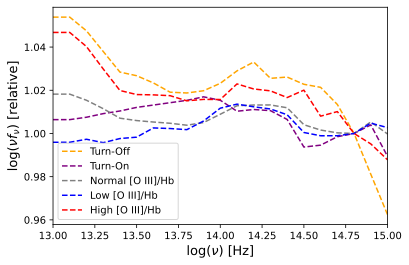

In [36]:
low_edd_wl, low_edd_flux = Composite_SED(low_edd_cat,"../sed/high_oiii/")
low_bpt_wl, low_bpt_flux = Composite_SED(low_bpt_cat,"../sed/low_oiii/")
norm_oiii_wl, norm_oiii_flux = Composite_SED(norm_oiii_cat,"../sed/norm_oiii/")
low_oiii_wl, low_oiii_flux = Composite_SED(low_oiii_cat,"../sed/low_oiii/")
high_oiii_wl, high_oiii_flux = Composite_SED(high_oiii_cat,"../sed/high_oiii/")

plt.plot(low_edd_wl,smooth(low_edd_flux,1),label='Turn-Off',c='orange',linestyle='--')
plt.plot(low_bpt_wl,smooth(low_bpt_flux,1),label='Turn-On',c='purple',linestyle='--')
plt.plot(norm_oiii_wl,smooth(norm_oiii_flux,1),label='Normal [O III]/Hb',c='grey',linestyle='--')
plt.plot(low_oiii_wl,smooth(low_oiii_flux,1),label='Low [O III]/Hb',c='blue',linestyle='--')
plt.plot(high_oiii_wl,smooth(high_oiii_flux,1),label='High [O III]/Hb',c='red',linestyle='--')
plt.legend(loc='best')
plt.xlabel(r'log($\nu$) [Hz]',fontsize=13)
plt.ylabel(r'log($\nu f_{\nu}$) [relative]',fontsize=13)
plt.xlim(13,15)
# plt.savefig("../figure/j_compsed.pdf")